# load modules

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
filtered_candidate_genes = ['ftr81',
 'kank1b',
 'lmx1a',
 'mcm3l',
 'mcm6l',
 'npm2a',
 'orc1',
 'si:ch211-119o8.6',
 'si:dkey-208k4.2',
 'zgc:114123',
 'zgc:165514',
 'zgc:56231', #
 'zglp1'] ##

# CDD filtered

In [4]:
# hitdata_df_filtered_knownDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_knownDomains.csv')
hitdata_df_filtered_knownDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_knownDomain2.csv')
hitdata_df_filtered_knownDomain['gene_symbol'] = hitdata_df_filtered_knownDomain['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
len(hitdata_df_filtered_knownDomain['gene_symbol'].unique())

68

In [5]:
# hitdata_df_filtered_newDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_newDomains.csv')
hitdata_df_filtered_newDomain = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/hitdata_superfamily_DNAbinding_chrom_nucleo_newDomain2.csv')
hitdata_df_filtered_newDomain['gene_symbol'] = hitdata_df_filtered_newDomain['query'].str.split('GN=', expand = True)[1].str.split(' ', expand = True)[0]
len(hitdata_df_filtered_newDomain['gene_symbol'].unique())

5

# previously filtered Transcripts

In [8]:
previous_filtered_trans = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/H3K36me3/filtered_transcriptID.txt',
            sep = '\t', header = None, names = ['transcript_id'])['transcript_id'].tolist()
previous_filtered_trans[:5]

['ENSDART00000171547.1',
 'ENSDART00000168091.1',
 'ENSDART00000164075.1',
 'ENSDART00000170183.1',
 'ENSDART00000165693.1']

# ribo-seq

In [ ]:
# - "rpf_" Translation rate calculated with ribosome footprinting.
# - "mrna_" Corresponding mRNA expression ("r0" using Ribo-zero depletion kit or "pa" poly(A) selection)
# - "_cds" Including reads mapping to the coding-sequence only
# - "_cds_woss" Including reads mapping to the coding-sequence WithOut the Start and Stop (WOSS) codons
# - "_exons" Full transcript
# - "_cov" Coverage per codon (for rpf_) or per nucleotide (for mrna_)
# - "_te" Translation efficiency: log2(rpf_ + 0.5) - log2(mrna_ + 0.5)

## read in TPM

In [3]:
# rpf_mRNAr0_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/riboSeq_rpkm/rpf_mrna_giraldez_rpkm_5_ensembl104_v9.csv',
rpf_mRNAr0_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/riboSeq_rpkm/rpf_mrna_giraldez_tpm_5_ensembl104_v9.csv',
                               sep = ",", comment = '#',)
rpf_mRNAr0_df.columns = ['transcript'] + rpf_mRNAr0_df.columns[1:].tolist()
rpf_mRNAr0_df

,transcript,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds,rpf_2h_cds_woss,rpf_5h_cds_woss,rpf_12h_cds_woss,rpf_24h_cds_woss,...,rpf_5h_cds_woss_te,rpf_12h_cds_woss_te,rpf_24h_cds_woss_te,rpf_48h_cds_woss_te,rpf_2h_ctrl_pata_cds_te,rpf_2h_pata_cds_te,rpf_2h_ctrl_pata_cds_woss_te,rpf_2h_pata_cds_woss_te,gene,gene_name
0,ENSDART00000000004,2.172181,0.148718,1.303580,2.593686,0.366466,2.269488,0.159115,1.396892,2.745429,...,103.400613,54.057961,-15.278009,93.322570,97.573090,101.718856,94.486226,100.669085,ENSDARG00000000001,slc35a5
1,ENSDART00000000005,0.035561,0.000000,0.071077,2.337670,2.987689,0.037028,0.000000,0.075908,2.466098,...,0.000000,-28.186762,-56.398412,-11.895102,45.819568,19.028687,46.216166,18.947324,ENSDARG00000000002,ccdc80
2,ENSDART00000000042,47.322152,38.854855,2.208109,11.393902,0.277748,49.070040,40.916193,2.358623,12.022043,...,30.639891,-13.222698,-317.816841,-15.622002,64.433056,25.827114,63.232190,25.378615,ENSDARG00000033231,mcm6l
3,ENSDART00000000069,17.824149,37.716605,12.838289,11.027003,7.165552,18.641275,40.211161,13.572442,11.683837,...,-40.474221,-78.718900,-72.037140,-43.308356,8.900920,52.398714,5.947817,50.316826,ENSDARG00000000068,slc9a3r1a
4,ENSDART00000000070,120.460961,37.703622,56.883499,80.060714,46.714050,124.911751,37.834170,56.681783,82.785910,...,-23.547222,-74.236020,-110.307997,-30.797928,-80.512194,-20.321616,-58.255608,-22.089073,ENSDARG00000000069,dap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,ENSDART00000193988,0.035850,0.044385,0.000000,1.297996,8.543094,0.037331,0.047329,0.000000,1.369345,...,-0.622188,8.364053,-16.218141,-10.613999,3.178885,1.813153,3.216000,1.809568,ENSDARG00000076364,si:dkey-178k16.1
45211,ENSDART00000193989,2.464184,1.280476,1.477302,1.908720,1.666143,2.561780,1.363182,1.534474,1.847570,...,35.828191,50.137510,-2.502793,33.194933,39.203529,38.595113,36.274634,36.958252,ENSDARG00000103746,mapkbp1
45212,ENSDART00000193991,0.000000,0.000000,0.018093,0.000000,0.034743,0.000000,0.000000,0.019367,0.000000,...,1.497795,-1.044523,0.000000,-8.279170,0.000000,0.000000,0.000000,0.000000,ENSDARG00000076694,NAMPT
45213,ENSDART00000193992,6.470694,0.954735,3.984824,4.290439,2.866348,6.737149,0.991838,4.153015,4.525725,...,81.436881,22.407961,-8.962100,2.468002,61.743697,38.582411,59.228402,36.610687,ENSDARG00000101482,hk2


## TPM to z-score (not used)

In [146]:
rpf_mRNAr0_df_z = pd.DataFrame()
for c in rpf_mRNAr0_df.columns[1:-2] :
    rpf_mRNAr0_df_z[c] = (rpf_mRNAr0_df[c] - rpf_mRNAr0_df[c].mean())/(rpf_mRNAr0_df[c].std())

rpf_mRNAr0_df_z['transcript'] = rpf_mRNAr0_df['transcript']
rpf_mRNAr0_df_z['gene'] = rpf_mRNAr0_df['gene']
rpf_mRNAr0_df_z['gene_name'] = rpf_mRNAr0_df['gene_name']
rpf_mRNAr0_df_z

,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds,rpf_2h_cds_woss,rpf_5h_cds_woss,rpf_12h_cds_woss,rpf_24h_cds_woss,rpf_48h_cds_woss,...,rpf_12h_cds_woss_te,rpf_24h_cds_woss_te,rpf_48h_cds_woss_te,rpf_2h_ctrl_pata_cds_te,rpf_2h_pata_cds_te,rpf_2h_ctrl_pata_cds_woss_te,rpf_2h_pata_cds_woss_te,transcript,gene,gene_name
0,-0.138843,-0.114576,-0.129086,-0.131149,-0.135638,-0.137971,-0.115564,-0.125696,-0.129764,-0.134777,...,0.527184,-0.447919,1.790192,1.588210,2.207106,1.507784,2.168583,ENSDART00000000004,ENSDARG00000000001,slc35a5
1,-0.153717,-0.115352,-0.136731,-0.132869,-0.119292,-0.153490,-0.116402,-0.133710,-0.131636,-0.117889,...,-0.830242,-0.940466,-0.855088,0.498901,-0.085616,0.502103,-0.087492,ENSDART00000000005,ENSDARG00000000002,ccdc80
2,0.175468,0.087301,-0.123476,-0.072032,-0.136192,0.187372,0.098944,-0.119862,-0.067622,-0.135356,...,-0.583265,-4.071781,-0.948786,0.890678,0.102881,0.856623,0.090055,ENSDART00000000042,ENSDARG00000033231,mcm6l
3,-0.029882,0.081364,-0.057546,-0.074496,-0.093238,-0.024159,0.095234,-0.051833,-0.069887,-0.091108,...,-1.664261,-1.127789,-1.644849,-0.278163,0.839623,-0.336867,0.778519,ENSDART00000000069,ENSDARG00000000068,slc9a3r1a
4,0.684623,0.081296,0.215632,0.389252,0.153395,0.714600,0.082723,0.209691,0.406415,0.156021,...,-1.590273,-1.586204,-1.330324,-2.160131,-1.176669,-1.674512,-1.220376,ENSDART00000000070,ENSDARG00000000069,dap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45210,-0.153715,-0.115120,-0.137171,-0.139853,-0.084647,-0.153488,-0.116153,-0.134171,-0.138983,-0.082897,...,-0.226981,-0.459180,-0.822880,-0.398600,-0.562945,-0.393783,-0.560611,ENSDART00000193988,ENSDARG00000076364,si:dkey-178k16.1
45211,-0.136810,-0.108673,-0.128009,-0.135750,-0.127533,-0.135939,-0.109227,-0.124862,-0.135779,-0.126424,...,0.462478,-0.294895,0.278522,0.359647,0.456895,0.294976,0.409732,ENSDART00000193989,ENSDARG00000103746,mapkbp1
45212,-0.153964,-0.115352,-0.137059,-0.148573,-0.137707,-0.153747,-0.116402,-0.134053,-0.148156,-0.136922,...,-0.382267,-0.264916,-0.764180,-0.465509,-0.613218,-0.460787,-0.610567,ENSDART00000193991,ENSDARG00000076694,NAMPT
45213,-0.108918,-0.110372,-0.112457,-0.119751,-0.120049,-0.106913,-0.111182,-0.108976,-0.117838,-0.118786,...,0.004810,-0.372266,-0.493985,0.834073,0.456543,0.773206,0.400137,ENSDART00000193992,ENSDARG00000101482,hk2


In [112]:
rpf_mRNAr0_df.columns

Index(['transcript', 'rpf_2h_cds', 'rpf_5h_cds', 'rpf_12h_cds', 'rpf_24h_cds',
       'rpf_48h_cds', 'rpf_2h_cds_woss', 'rpf_5h_cds_woss', 'rpf_12h_cds_woss',
       'rpf_24h_cds_woss', 'rpf_48h_cds_woss', 'rpf_2h_ctrl_pata_cds',
       'rpf_2h_pata_cds', 'rpf_2h_ctrl_pata_cds_woss', 'rpf_2h_pata_cds_woss',
       'rpf_0h_chx_rm_cds', 'rpf_0h_chx_rm_cds_woss', 'mrna_r0_2h_cds',
       'mrna_r0_5h_cds', 'mrna_r0_12h_cds', 'mrna_r0_24h_cds',
       'mrna_r0_48h_cds', 'mrna_2h_ctrl_pata_cds', 'mrna_2h_pata_cds',
       'mrna_r0_2h_cds_woss', 'mrna_r0_5h_cds_woss', 'mrna_r0_12h_cds_woss',
       'mrna_r0_24h_cds_woss', 'mrna_r0_48h_cds_woss',
       'mrna_2h_ctrl_pata_cds_woss', 'mrna_2h_pata_cds_woss',
       'mrna_r0_2h_exons', 'mrna_r0_5h_exons', 'mrna_r0_12h_exons',
       'mrna_r0_24h_exons', 'mrna_r0_48h_exons', 'mrna_2h_ctrl_pata_exons',
       'mrna_2h_pata_exons', 'rpf_2h_cds_te', 'rpf_5h_cds_te',
       'rpf_12h_cds_te', 'rpf_24h_cds_te', 'rpf_48h_cds_te',
       'rpf_2h_cds_woss

## CDD hit

In [6]:
hitdata_filtered_rpf_mRNAr0_dict = {}
for i,df in enumerate([hitdata_df_filtered_knownDomain, hitdata_df_filtered_newDomain]):
    k = 'knownD_rpf' if i == 0 else 'newD_rpf'
    rpf_cols = ['transcript', 'gene', 'gene_name'] + [x for x in rpf_mRNAr0_df.columns if x[:3]=='rpf' and x[-2:]!='te' and 'pata' not in x and x[-4:]!='woss']
    hitdata_filtered_rpf_mRNAr0_dict[k] = pd.merge(df, rpf_mRNAr0_df, left_on = 'gene_symbol', right_on = 'gene_name')[['transcript', 'gene', 'gene_name', 
#     hitdata_filtered_rpf_mRNAr0_dict[k] = pd.merge(df, rpf_mRNAr0_df_z, left_on = 'gene_symbol', right_on = 'gene_name')[['transcript', 'gene', 'gene_name', 
                                                                                                                        'rpf_0h_chx_rm_cds', 
                                                                                                                        'rpf_2h_cds', 
                                                                                                                        'rpf_5h_cds', 
                                                                                                                        'rpf_12h_cds', 
                                                                                                                        'rpf_24h_cds', 
                                                                                                                        'rpf_48h_cds', 
                                                                                                                        ]]
    
hitdata_filtered_rpf_mRNAr0_dict[k].head(2)

,transcript,gene,gene_name,rpf_0h_chx_rm_cds,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds
0,ENSDART00000115307,ENSDARG00000079591,si:ch211-203d1.3,41.446635,20.710583,7.330559,2.010914,3.642054,3.221991
1,ENSDART00000105768,ENSDARG00000057249,zmynd11,74.659880,97.960529,5.504125,6.384582,9.549158,8.167913


### CDD domain histogram

In [287]:
CDD_domain_df = pd.concat([hitdata_df_filtered_knownDomain, hitdata_df_filtered_newDomain], axis = 0).drop_duplicates()
CDD_domain_df = CDD_domain_df[['class', 'gene_symbol']].drop_duplicates()
CDD_domain_df['class_times'] = 1
CDD_domain_df_class = CDD_domain_df[['class', 'class_times']].groupby(['class']).sum()
CDD_domain_df_class
CDD_domain_df_class['super_class'] = ['Chromatin structure',
                                      'Chromatin structure',
                                      'Chromatin structure',
                                      'DNA methylation',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'DNA binding',
                                      'DNA binding',
                                      'DNA binding',
                                      'Chromatin structure',
                                      'Chromatin structure',
                                     ]
CDD_domain_df_class = CDD_domain_df_class.sort_values('super_class')
CDD_domain_df_class

,class_times,super_class
class,,
BAH domain,1,Chromatin structure
RecF/RecN/SMC,17,Chromatin structure
Nucleoplasmin,1,Chromatin structure
minichromosome maintenance,2,Chromatin structure
H4 superfamily,1,Chromatin structure
ubinuclein (histone),1,Chromatin structure
DNA/RNA helicase,1,Chromatin structure
DEK domain,1,Chromatin structure
Bromodomain,1,Chromatin structure


In [383]:
CDD_domain_df_class.to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/CDD_domain_df_class.tsv',
                          sep = "\t",
                          index = True
                          )

In [26]:
CDD_domain_df_class = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/CDD_domain_df_class.tsv',
                          sep = "\t",
                          )
CDD_domain_df_class.index = CDD_domain_df_class['class']
CDD_domain_df_class

,class,class_times,super_class
class,,,
BAH domain,BAH domain,1,Chromatin structure
RecF/RecN/SMC,RecF/RecN/SMC,17,Chromatin structure
Nucleoplasmin,Nucleoplasmin,1,Chromatin structure
minichromosome maintenance,minichromosome maintenance,2,Chromatin structure
H4 superfamily,H4 superfamily,1,Chromatin structure
ubinuclein (histone),ubinuclein (histone),1,Chromatin structure
DNA/RNA helicase,DNA/RNA helicase,1,Chromatin structure
DEK domain,DEK domain,1,Chromatin structure
Bromodomain,Bromodomain,1,Chromatin structure


In [22]:
print(1)

1


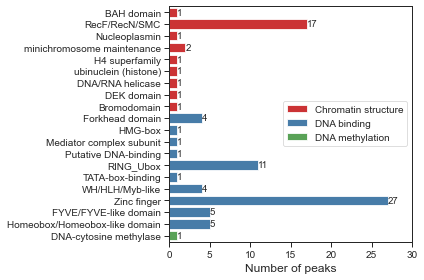

In [27]:
### not used !!!


import math
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6,4), tight_layout = True)
    h = sns.barplot(y = CDD_domain_df_class.index.tolist(),
                    x = CDD_domain_df_class['class_times'], 
                    hue = CDD_domain_df_class['super_class'],
                    palette = 'Set1',
                    dodge = False,
                    orient = 'h')
    ax.set_xlim(0,30)
    ax.set_xlabel('Number of peaks')
    for p in ax.patches:
        h, w, y = p.get_height(), p.get_width(), p.get_y()
        if math.isnan(float(w)) != True :
            xy = (w, y + h / 2.)
            text = f'{int(w)}'
            ax.annotate(text=text, xy=xy, ha='left', va='center')    
    
    ax.legend().set_title('')
        
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make4_bar_CDD_domain.pdf',transparent=True)


### heatmap

In [9]:
filtered_CDD_trans_df = pd.concat([hitdata_filtered_rpf_mRNAr0_dict['knownD_rpf'], hitdata_filtered_rpf_mRNAr0_dict['newD_rpf']], axis = 0).drop_duplicates()
# filtered_CDD_trans_df = hitdata_filtered_rpf_mRNAr0_dict['knownD_rpf'].drop_duplicates()
filtered_CDD_trans_df = filtered_CDD_trans_df.assign(m=filtered_CDD_trans_df.iloc[:,3:].mean(axis=1)).sort_values('m', ascending=False).drop('m', axis=1)
filtered_CDD_trans_df.index = filtered_CDD_trans_df['gene_name']
filtered_CDD_trans_df = filtered_CDD_trans_df.loc[filtered_CDD_trans_df['transcript'].isin([x.split('.')[0] for x in previous_filtered_trans])]
filtered_CDD_trans_df

,transcript,gene,gene_name,rpf_0h_chx_rm_cds,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds
gene_name,,,,,,,,,
orc6,ENSDART00000174165,ENSDARG00000075682,orc6,796.713131,566.446353,30.042964,66.990166,52.183903,12.071310
orc6,ENSDART00000174333,ENSDARG00000075682,orc6,515.001811,517.260018,27.479327,42.000219,36.736294,9.698790
orc6,ENSDART00000113732,ENSDARG00000075682,orc6,506.499247,476.916391,27.137212,40.644291,34.445171,9.407327
orc6,ENSDART00000174137,ENSDARG00000075682,orc6,506.499247,476.916391,27.137212,40.644291,34.445171,9.407327
hmgb3b,ENSDART00000182627,ENSDARG00000006408,hmgb3b,270.027800,192.382070,283.501094,61.629765,53.495768,35.333139
...,...,...,...,...,...,...,...,...,...
zgc:174653,ENSDART00000172316,ENSDARG00000100961,zgc:174653,0.000000,0.000000,0.572314,0.455920,0.018850,0.057648
zgc:174653,ENSDART00000164413,ENSDARG00000100961,zgc:174653,0.000000,0.000000,0.546166,0.459169,0.017818,0.054491
znf993,ENSDART00000156770,ENSDARG00000113582,znf993,0.000000,0.010339,0.469960,0.153400,0.112929,0.052329


In [10]:
print(len(filtered_CDD_trans_df.index.unique()), len(filtered_CDD_trans_df['transcript'].unique()))

71 161


In [11]:
filtered_CDD_trans_df_max0 = filtered_CDD_trans_df.loc[filtered_CDD_trans_df.iloc[:,3:].idxmax(axis = 1) == 'rpf_0h_chx_rm_cds']

In [12]:
filtered_CDD_trans_df_max0_filtered = filtered_CDD_trans_df_max0.loc[(filtered_CDD_trans_df_max0['rpf_0h_chx_rm_cds'] > 5 * filtered_CDD_trans_df_max0['rpf_24h_cds']) & (filtered_CDD_trans_df_max0['rpf_0h_chx_rm_cds'] > 15)]
print(len(filtered_CDD_trans_df_max0_filtered.index.unique()), len(filtered_CDD_trans_df_max0_filtered['transcript'].unique()))

40 93


In [13]:
rpf_filtered_gene_ls = sorted(filtered_CDD_trans_df_max0_filtered.index.unique().tolist())
print(rpf_filtered_gene_ls)

['accs', 'chek2', 'chfr', 'cop1', 'cpeb1b', 'ftr81', 'golga1', 'kank1b', 'kifc3', 'lhx8a', 'lmx1a', 'mcm3l', 'mcm6l', 'med13b', 'nin', 'ninl', 'npm2a', 'nsmce1', 'orc1', 'orc6', 'recql4', 'rufy1', 'scnm1', 'si:ch211-203d1.3', 'si:dkeyp-34c12.1', 'specc1lb', 'spire1a', 'ssx2ipa', 'supv3l1', 'trim35-29', 'trim36', 'uacab', 'usp16', 'zgc:113984', 'zgc:114123', 'zgc:162936', 'zgc:165514', 'zgc:56231', 'zglp1', 'znf653']


In [14]:
rpf_filtered_trans_ls = sorted(filtered_CDD_trans_df_max0_filtered['transcript'].unique().tolist())
print(rpf_filtered_trans_ls)

['ENSDART00000000042', 'ENSDART00000004284', 'ENSDART00000005112', 'ENSDART00000019078', 'ENSDART00000024062', 'ENSDART00000024185', 'ENSDART00000036421', 'ENSDART00000054653', 'ENSDART00000066086', 'ENSDART00000073914', 'ENSDART00000074729', 'ENSDART00000077251', 'ENSDART00000078066', 'ENSDART00000078124', 'ENSDART00000085512', 'ENSDART00000085645', 'ENSDART00000091177', 'ENSDART00000097468', 'ENSDART00000098578', 'ENSDART00000098904', 'ENSDART00000102239', 'ENSDART00000106627', 'ENSDART00000108556', 'ENSDART00000109130', 'ENSDART00000110060', 'ENSDART00000110783', 'ENSDART00000111774', 'ENSDART00000112082', 'ENSDART00000112214', 'ENSDART00000113609', 'ENSDART00000113732', 'ENSDART00000115227', 'ENSDART00000115307', 'ENSDART00000122385', 'ENSDART00000122979', 'ENSDART00000128591', 'ENSDART00000129562', 'ENSDART00000130492', 'ENSDART00000131761', 'ENSDART00000132184', 'ENSDART00000132351', 'ENSDART00000133835', 'ENSDART00000133880', 'ENSDART00000134938', 'ENSDART00000135214', 'ENSDART0

In [15]:
sorted(filtered_CDD_trans_df_max0_filtered.loc[filtered_CDD_trans_df_max0_filtered['gene_name'].isin(filtered_candidate_genes)].index.unique())

['ftr81',
 'kank1b',
 'lmx1a',
 'mcm3l',
 'mcm6l',
 'npm2a',
 'orc1',
 'zgc:114123',
 'zgc:165514',
 'zgc:56231',
 'zglp1']

In [244]:
filtered_CDD_trans_df.loc[filtered_CDD_trans_df['gene_name'].isin(filtered_candidate_genes)]

,transcript,gene,gene_name,rpf_0h_chx_rm_cds,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds
gene_name,,,,,,,,,
zgc:56231,ENSDART00000024185,ENSDARG00000010332,zgc:56231,610.864512,92.930595,0.296213,1.463053,8.230222,0.128431
orc1,ENSDART00000151213,ENSDARG00000039217,orc1,216.317173,29.729856,7.514360,12.236203,13.555133,4.109724
orc1,ENSDART00000191909,ENSDARG00000039217,orc1,214.704429,29.577239,7.770374,12.825392,14.036769,4.289863
orc1,ENSDART00000130492,ENSDARG00000039217,orc1,215.922150,29.664656,7.497879,12.349704,13.525408,4.106414
mcm6l,ENSDART00000147117,ENSDARG00000033231,mcm6l,113.344388,69.010910,41.808923,1.163344,7.573136,0.286117
mcm6l,ENSDART00000000042,ENSDARG00000033231,mcm6l,129.770647,47.322152,38.854855,2.208109,11.393902,0.277748
zgc:114123,ENSDART00000134938,ENSDARG00000044956,zgc:114123,199.491607,1.324237,0.000000,2.161322,10.837772,0.309338
zgc:114123,ENSDART00000066086,ENSDARG00000044956,zgc:114123,169.514348,1.472109,0.235806,1.332406,7.067674,0.084348
zgc:165514,ENSDART00000162918,ENSDARG00000076214,zgc:165514,109.462648,19.505582,0.133580,0.465280,2.450527,0.137891


In [377]:
filtered_CDD_trans_df_max0_filtered.loc[filtered_CDD_trans_df_max0_filtered.index == 'trim35-29']

,transcript,gene,gene_name,rpf_0h_chx_rm_cds,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds
gene_name,,,,,,,,,
trim35-29,ENSDART00000078124,ENSDARG00000055730,trim35-29,16.436691,12.117941,0.057249,0.65319,2.324247,0.122869


In [376]:
filtered_CDD_trans_df_max0_filtered['rank'] = range()

,transcript,gene,gene_name,rpf_0h_chx_rm_cds,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds
gene_name,,,,,,,,,
orc6,ENSDART00000174165,ENSDARG00000075682,orc6,796.713131,566.446353,30.042964,66.990166,52.183903,12.071310
orc6,ENSDART00000113732,ENSDARG00000075682,orc6,506.499247,476.916391,27.137212,40.644291,34.445171,9.407327
orc6,ENSDART00000174137,ENSDARG00000075682,orc6,506.499247,476.916391,27.137212,40.644291,34.445171,9.407327
zgc:56231,ENSDART00000024185,ENSDARG00000010332,zgc:56231,610.864512,92.930595,0.296213,1.463053,8.230222,0.128431
cpeb1b,ENSDART00000098904,ENSDARG00000008454,cpeb1b,228.913172,131.872663,3.414224,0.864955,3.893432,0.148879
...,...,...,...,...,...,...,...,...,...
npm2a,ENSDART00000147942,ENSDARG00000076391,npm2a,18.099357,2.766881,4.544169,0.516570,2.878239,0.600168
scnm1,ENSDART00000004284,ENSDARG00000003027,scnm1,16.572908,3.219297,2.102363,3.617090,1.853324,1.608483
lmx1a,ENSDART00000139609,ENSDARG00000020354,lmx1a,21.273964,0.000000,0.223586,0.647876,2.301280,0.106636


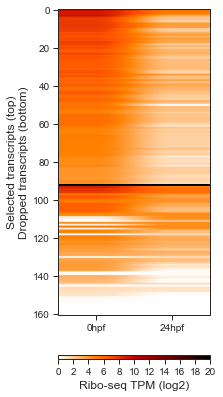

In [21]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    colors = ['#FFFFFF', '#FF0000']
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)
    fig, ax = plt.subplots(figsize = (6.4 * .5, 4.8 * 1.25), tight_layout = True)

    # Draw the heatmap with the mask and correct aspect ratio
    df = filtered_CDD_trans_df.copy()
    df['select'] = df['transcript'].isin(filtered_CDD_trans_df_max0_filtered['transcript'])
    line_y = df['select'].sum()
#     df = df.sort_values('select')
    df = df.assign(m=df.iloc[:,3:].mean(axis=1).astype('int')).sort_values(['select', 'm'] + df.columns[3:-1].tolist(), ascending=False).drop(['m','select'], axis=1)
    pos = ax.imshow(np.log2(df.iloc[:, [3,7]].astype('float')+1),
                  aspect = 'auto',
                  vmax = 20,
                  vmin = 0,
                  cmap = 'gist_heat_r' #'YlGnBu_r'
                )
    
    cbar = fig.colorbar(pos, ax=ax, extend='neither', 
                        aspect = 50,
                        pad=0.1, orientation="horizontal",
                        ticks=[x*2 for x in range(11)])
    
    cbar.set_label('Ribo-seq TPM (log2)')
    cbar.ax.set_xticklabels([str(x*2) for x in range(11)]) 

#     ax.set_yticks(range(6))
#     ax.set_yticklabels(nanog_cluster_tf_df_percent.index)
    ax.axhline(line_y-1, color = 'black', linewidth=2)
    ax.set_ylabel('Selected transcripts (top)\nDropped transcripts (bottom)')
    ax.set_xticks(range(2))
    ax.set_xticklabels([x.split('_')[1]+'pf' for x in filtered_CDD_trans_df.columns[[3,7]]])
    ax.set_xlabel('')
    ax.set_title('')

    
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make4_heatmap_riboTPM_0_24hpf.pdf',transparent=True)

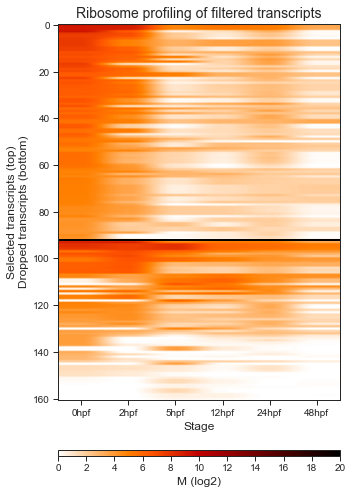

In [371]:
### not used

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    colors = ['#FFFFFF', '#FF0000']
    cmap1 = mpl.colors.LinearSegmentedColormap.from_list("mycmap", colors)
    fig, ax = plt.subplots(figsize = (5,7.5), tight_layout = True)

    # Draw the heatmap with the mask and correct aspect ratio
    df = filtered_CDD_trans_df.copy()
    df['select'] = df['transcript'].isin(filtered_CDD_trans_df_max0_filtered['transcript'])
    line_y = df['select'].sum()
#     df = df.sort_values('select')
    df = df.assign(m=df.iloc[:,3:].mean(axis=1).astype('int')).sort_values(['select', 'm'] + df.columns[3:-1].tolist(), ascending=False).drop(['m','select'], axis=1)
    pos = ax.imshow(np.log2(df.iloc[:, 3:].astype('float')+1),
                  aspect = 'auto',
                  vmax = 20,
                  vmin = 0,
                  cmap = 'gist_heat_r' #'YlGnBu_r'
                )
    
    cbar = fig.colorbar(pos, ax=ax, extend='neither', 
                        aspect = 50,
                        pad=0.1, orientation="horizontal",
                        ticks=[x*2 for x in range(11)])
    
    cbar.set_label('M (log2)')
    cbar.ax.set_xticklabels([str(x*2) for x in range(11)]) 

#     ax.set_yticks(range(6))
#     ax.set_yticklabels(nanog_cluster_tf_df_percent.index)
    ax.axhline(line_y-1, color = 'black', linewidth=2)
    ax.set_ylabel('Selected transcripts (top)\nDropped transcripts (bottom)')
    ax.set_xticks(range(6))
    ax.set_xticklabels([x.split('_')[1]+'pf' for x in filtered_CDD_trans_df.columns[3:]])
    ax.set_xlabel('Stage')
    ax.set_title('Ribosome profiling of filtered transcripts')

    
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make4_heatmap_riboTPM.pdf',transparent=True)

# Zfin in-situ

## stage to hpf

In [183]:
stage_series_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/zfin_insitu_data/stage_ontology.txt',
                   sep = '\t', header = None, names = ['Stage ID','Stage OBO ID','Stage Name','Begin Hours','End Hours']
                   )
stage_series_df.head()

,Stage ID,Stage OBO ID,Stage Name,Begin Hours,End Hours
0,ZDB-STAGE-050211-1,ZFS:0000000,Unknown,0.00,17520.00
1,ZDB-STAGE-010723-4,ZFS:0000001,Zygote:1-cell,0.00,0.75
2,ZDB-STAGE-010723-15,ZFS:0000002,Cleavage:2-cell,0.75,1.00
3,ZDB-STAGE-010723-11,ZFS:0000003,Cleavage:4-cell,1.00,1.25
4,ZDB-STAGE-010723-33,ZFS:0000004,Cleavage:8-cell,1.25,1.50


## zfin-xpat to gene

In [185]:
expr_assay_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/zfin_insitu_data/xpat_fish.txt', 
                           sep = "\t", header = None, names = ['Gene ID','Gene Symbol','EST ID (Optional)','EST Symbol (Optional)',
                                                               'Expression Type','Expression Type MMO ID',
                                                               'Expression ID','Publication ID','Fish ID','Environment ID',
                                                               'Probe Quality (optional 0 - 5 rating)'])
expr_assay_df.head(2)

,Gene ID,Gene Symbol,EST ID (Optional),EST Symbol (Optional),Expression Type,Expression Type MMO ID,Expression ID,Publication ID,Fish ID,Environment ID,Probe Quality (optional 0 - 5 rating)
0,ZDB-EFG-070117-1,EGFP,NaN,NaN,Immunohistochemistry,MMO:0000498,ZDB-XPAT-150811-5,ZDB-PUB-150325-8,ZDB-FISH-150901-25116,ZDB-EXP-041102-1,NaN
1,ZDB-EFG-070117-1,EGFP,NaN,NaN,Intrinsic fluorescence,MMO:0000670,ZDB-XPAT-080422-10,ZDB-PUB-060503-2,ZDB-FISH-150901-12941,ZDB-EXP-041102-1,NaN


## expr stage anatomy

In [186]:
expr_stage_anatomy_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/zfin_insitu_data/xpat_stage_anatomy.txt',
                                   sep = "\t", header = None, names = ['Expression Result ID','Expression ID','Start Stage ID',
                                                                       'End Stage ID','Anatomy Super Term ID',
                                                                       'Anatomy Sub Term ID','Expression Found'])
expr_stage_anatomy_df.head(2)

,Expression Result ID,Expression ID,Start Stage ID,End Stage ID,Anatomy Super Term ID,Anatomy Sub Term ID,Expression Found
0,1012169852,ZDB-XPAT-011001-1,ZDB-STAGE-010723-32,ZDB-STAGE-010723-13,ZFA:0000013,NaN,t
1,1012113410,ZDB-XPAT-011001-1,ZDB-STAGE-010723-16,ZDB-STAGE-010723-10,ZFA:0000029,NaN,t


In [187]:
expr_gene_stage_df = pd.merge(pd.merge(expr_assay_df, expr_stage_anatomy_df, on = 'Expression ID'), stage_series_df, left_on = 'End Stage ID', right_on = 'Stage ID')
expr_gene_stage_df.head(2)

,Gene ID,Gene Symbol,EST ID (Optional),EST Symbol (Optional),Expression Type,Expression Type MMO ID,Expression ID,Publication ID,Fish ID,Environment ID,...,Start Stage ID,End Stage ID,Anatomy Super Term ID,Anatomy Sub Term ID,Expression Found,Stage ID,Stage OBO ID,Stage Name,Begin Hours,End Hours
0,ZDB-EFG-070117-1,EGFP,NaN,NaN,Immunohistochemistry,MMO:0000498,ZDB-XPAT-150811-5,ZDB-PUB-150325-8,ZDB-FISH-150901-25116,ZDB-EXP-041102-1,...,ZDB-STAGE-010723-39,ZDB-STAGE-010723-39,ZFA:0000667,NaN,t,ZDB-STAGE-010723-39,ZFS:0000044,Adult,2160.0,17520.0
1,ZDB-EFG-070117-1,EGFP,NaN,NaN,Immunohistochemistry,MMO:0000498,ZDB-XPAT-150811-5,ZDB-PUB-150325-8,ZDB-FISH-150901-25116,ZDB-EXP-041102-1,...,ZDB-STAGE-010723-39,ZDB-STAGE-010723-39,ZFA:0000667,NaN,t,ZDB-STAGE-010723-39,ZFS:0000044,Adult,2160.0,17520.0


## candidates' in-situ expr

In [188]:
expr_gene_stage_df_candidate = expr_gene_stage_df.loc[expr_gene_stage_df['Gene Symbol'].isin(filtered_candidate_genes)].sort_values('End Hours')

In [189]:
expr_gene_stage_df_candidate['Gene Symbol'].unique()

array(['mcm3l', 'npm2a', 'orc1', 'mcm6l', 'kank1b', 'lmx1a', 'ftr81',
       'zgc:56231', 'zgc:165514'], dtype=object)

In [198]:
expr_gene_stage_df_candidate.loc[expr_gene_stage_df_candidate['Begin Hours'] < 24][['Gene Symbol', 'Expression Found', 'Begin Hours', 'End Hours']]


,Gene Symbol,Expression Found,Begin Hours,End Hours
393713,mcm3l,t,0.00,0.75
394080,npm2a,t,0.00,0.75
394081,npm2a,t,0.00,0.75
409178,npm2a,t,1.00,1.25
411711,mcm3l,t,1.75,2.00
410826,mcm3l,t,3.00,3.33
407487,mcm3l,t,4.00,4.33
390274,npm2a,t,6.00,8.00
389448,mcm3l,t,6.00,8.00
400968,mcm3l,t,8.00,9.00


In [27]:
filtered_candidate_genes

['ftr81',
 'kank1b',
 'lmx1a',
 'mcm3l',
 'mcm6l',
 'npm2a',
 'orc1',
 'si:ch211-119o8.6',
 'si:dkey-208k4.2',
 'zgc:114123',
 'zgc:165514',
 'zgc:56231',
 'zglp1']

## ribo filtered genes' in-situ expr

In [234]:
filtered_CDD_trans_df_max0_filtered

,transcript,gene,gene_name,rpf_0h_chx_rm_cds,rpf_2h_cds,rpf_5h_cds,rpf_12h_cds,rpf_24h_cds,rpf_48h_cds
gene_name,,,,,,,,,
orc6,ENSDART00000174165,ENSDARG00000075682,orc6,796.713131,566.446353,30.042964,66.990166,52.183903,12.071310
orc6,ENSDART00000113732,ENSDARG00000075682,orc6,506.499247,476.916391,27.137212,40.644291,34.445171,9.407327
orc6,ENSDART00000174137,ENSDARG00000075682,orc6,506.499247,476.916391,27.137212,40.644291,34.445171,9.407327
zgc:56231,ENSDART00000024185,ENSDARG00000010332,zgc:56231,610.864512,92.930595,0.296213,1.463053,8.230222,0.128431
cpeb1b,ENSDART00000098904,ENSDARG00000008454,cpeb1b,228.913172,131.872663,3.414224,0.864955,3.893432,0.148879
...,...,...,...,...,...,...,...,...,...
npm2a,ENSDART00000147942,ENSDARG00000076391,npm2a,18.099357,2.766881,4.544169,0.516570,2.878239,0.600168
scnm1,ENSDART00000004284,ENSDARG00000003027,scnm1,16.572908,3.219297,2.102363,3.617090,1.853324,1.608483
lmx1a,ENSDART00000139609,ENSDARG00000020354,lmx1a,21.273964,0.000000,0.223586,0.647876,2.301280,0.106636


In [235]:
expr_gene_stage_df_filtered = expr_gene_stage_df.loc[expr_gene_stage_df['Gene Symbol'].isin(filtered_CDD_trans_df_max0_filtered['gene_name'])].sort_values('End Hours')
expr_gene_stage_df_filtered_24 = expr_gene_stage_df_filtered.loc[(expr_gene_stage_df_filtered['Begin Hours'] < 24) & (expr_gene_stage_df_filtered['Expression Found'] == 't')][['Gene Symbol', 
                                                                                                                                                                              'Expression Found', 
                                                                                                                                                                              'Begin Hours', 
                                                                                                                                                                              'End Hours']]
expr_gene_stage_df_filtered_24.sort_values(['Gene Symbol', 'Begin Hours'])['Gene Symbol'].unique()
# 5/13

array(['chek2', 'chfr', 'cpeb1b', 'kank1b', 'lhx8a', 'mcm3l', 'mcm6l',
       'med13b', 'nin', 'ninl', 'npm2a', 'orc1', 'orc6', 'uacab'],
      dtype=object)

In [236]:
set(rpf_filtered_gene_ls) - set(expr_gene_stage_df_filtered_24.sort_values(['Gene Symbol', 'Begin Hours'])['Gene Symbol'].unique().tolist())

{'accs',
 'cop1',
 'ftr81',
 'golga1',
 'kifc3',
 'lmx1a',
 'nsmce1',
 'recql4',
 'rufy1',
 'scnm1',
 'si:ch211-203d1.3',
 'si:dkeyp-34c12.1',
 'specc1lb',
 'spire1a',
 'ssx2ipa',
 'supv3l1',
 'trim35-29',
 'trim36',
 'usp16',
 'zgc:113984',
 'zgc:114123',
 'zgc:162936',
 'zgc:165514',
 'zgc:56231',
 'zglp1',
 'znf653'}

In [ ]:
# no data availabel:
# cop1 recql4 rufy1 si:ch211-203d1.3 spire1a ssx2ipa zgc:114123!!! zgc:162936 zglp1!!! znf653

In [ ]:
30 9

# final list

In [238]:
set(rpf_filtered_gene_ls) - set(['cop1','recql4','rufy1','si:ch211-203d1.3','spire1a','ssx2ipa','zgc:114123','zgc:162936','zglp1','znf653'])

{'accs',
 'chek2',
 'chfr',
 'cpeb1b',
 'ftr81',
 'golga1',
 'kank1b',
 'kifc3',
 'lhx8a',
 'lmx1a',
 'mcm3l',
 'mcm6l',
 'med13b',
 'nin',
 'ninl',
 'npm2a',
 'nsmce1',
 'orc1',
 'orc6',
 'scnm1',
 'si:dkeyp-34c12.1',
 'specc1lb',
 'supv3l1',
 'trim35-29',
 'trim36',
 'uacab',
 'usp16',
 'zgc:113984',
 'zgc:165514',
 'zgc:56231'}

# expr data WT

In [33]:
zfin_insitu_df = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/zfin_insitu_data/wildtype-expression_fish.txt',
                            sep = '\t', header = None, names = ['Gene ID','Gene Symbol','Fish Name','Super Structure ID','Super Structure Name',
                                                                'Sub Structure ID','Sub Structure Name','Start Stage','End Stage','Assay',
                                                                'Assay MMO ID','Publication ID','Probe ID','Antibody ID','Fish ID']
                            )
zfin_insitu_df

,Gene ID,Gene Symbol,Fish Name,Super Structure ID,Super Structure Name,Sub Structure ID,Sub Structure Name,Start Stage,End Stage,Assay,Assay MMO ID,Publication ID,Probe ID,Antibody ID,Fish ID
0,ZDB-GENE-000926-1,atoh7,WT,ZFA:0001202,optic cup,BSPO:0000084,ventral region,Pharyngula:Prim-5,Pharyngula:Prim-5,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-121019-32,NaN,NaN,ZDB-FISH-150901-29105
1,ZDB-GENE-980526-437,tbxta,WT,ZFA:0000135,notochord,NaN,NaN,Gastrula:Bud,Gastrula:Bud,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-200226-12,NaN,NaN,ZDB-FISH-150901-29105
2,ZDB-GENE-050113-4,bglap,WT,ZFA:0001094,whole organism,NaN,NaN,Juvenile:Days 30-44,Juvenile:Days 30-44,Reverse transcription PCR,MMO:0000655,ZDB-PUB-180126-19,NaN,NaN,ZDB-FISH-150901-29105
3,ZDB-GENE-021210-4,b3gnt7,AB/TU,ZFA:0000092,axis,NaN,NaN,Segmentation:1-4 somites,Segmentation:10-13 somites,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-010810-1,ZDB-EST-021210-12,NaN,ZDB-FISH-150901-29084
4,ZDB-GENE-050320-92,cdh6,WT,ZFA:0001680,parvocellular preoptic nucleus,BSPO:0000072,posterior region,Adult,Adult,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-150123-2,NaN,NaN,ZDB-FISH-150901-29105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224921,ZDB-GENE-050425-1,fat1a,WT,ZFA:0000368,integument,NaN,NaN,Adult,Adult,Reverse transcription PCR,MMO:0000655,ZDB-PUB-050308-6,NaN,NaN,ZDB-FISH-150901-29105
224922,ZDB-GENE-030131-4340,nkx2.9,WT,ZFA:0000128,midbrain,BSPO:0000084,ventral region,Pharyngula:Prim-5,Pharyngula:Prim-5,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-101201-47,NaN,NaN,ZDB-FISH-150901-29105
224923,ZDB-GENE-040329-3,mao,WT,ZFA:0001338,intestine,NaN,NaN,Adult,Adult,Reverse transcription PCR,MMO:0000655,ZDB-PUB-060825-10,NaN,NaN,ZDB-FISH-150901-29105
224924,ZDB-GENE-040426-1321,ptger2a,TU,ZFA:0001206,intermediate mesoderm,NaN,NaN,Segmentation:10-13 somites,Segmentation:10-13 somites,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-161221-3,NaN,NaN,ZDB-FISH-150901-15216


In [30]:
zfin_insitu_df_hpf = pd.merge(zfin_insitu_df, stage_series_df, left_on = 'stage_end', right_on = 'stage')
zfin_insitu_df_hpf

,ZDB_GENE,gene_symbol,Fish,ZFA,Anatomy,BSPO,region,stage_start,stage_end,Assay,MMO,ZDB_PUB,ZDB_EST,ZDB_ATB,ZDB_FISH,ZDB_STAGE,ZFS,stage,hpf_start,hpf_end
0,ZDB-GENE-000926-1,atoh7,WT,ZFA:0001202,optic cup,BSPO:0000084,ventral region,Pharyngula:Prim-5,Pharyngula:Prim-5,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-121019-32,NaN,NaN,ZDB-FISH-150901-29105,ZDB-STAGE-010723-10,ZFS:0000029,Pharyngula:Prim-5,24.00,30.0
1,ZDB-GENE-040426-1657,desi1a,AB/TU,ZFA:0000128,midbrain,NaN,NaN,Segmentation:20-25 somites,Pharyngula:Prim-5,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-040907-1,ZDB-CDNA-040425-2597,NaN,ZDB-FISH-150901-29084,ZDB-STAGE-010723-10,ZFS:0000029,Pharyngula:Prim-5,24.00,30.0
2,ZDB-GENE-050726-3,sid4,WT,ZFA:0000101,diencephalon,NaN,NaN,Pharyngula:Prim-5,Pharyngula:Prim-5,Reverse transcription PCR,MMO:0000655,ZDB-PUB-050607-17,NaN,NaN,ZDB-FISH-150901-29105,ZDB-STAGE-010723-10,ZFS:0000029,Pharyngula:Prim-5,24.00,30.0
3,ZDB-GENE-990415-128,six3b,AB,ZFA:0000079,telencephalon,NaN,NaN,Pharyngula:Prim-5,Pharyngula:Prim-5,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-091101-13,NaN,NaN,ZDB-FISH-150901-27842,ZDB-STAGE-010723-10,ZFS:0000029,Pharyngula:Prim-5,24.00,30.0
4,ZDB-GENE-050309-171,im:7151033,AB/TU,ZFA:0001185,periderm,NaN,NaN,Segmentation:20-25 somites,Pharyngula:Prim-5,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-040907-1,ZDB-EST-050309-295,NaN,ZDB-FISH-150901-29084,ZDB-STAGE-010723-10,ZFS:0000029,Pharyngula:Prim-5,24.00,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224921,ZDB-GENE-020503-2,igf1rb,AB,ZFA:0001093,unspecified,NaN,NaN,Blastula:512-cell,Blastula:512-cell,Reverse transcription PCR,MMO:0000655,ZDB-PUB-020624-5,NaN,NaN,ZDB-FISH-150901-27842,ZDB-STAGE-010723-14,ZFS:0000010,Blastula:512-cell,2.75,3.0
224922,ZDB-GENE-030828-11,dynll2a,AB/TU,ZFA:0001094,whole organism,NaN,NaN,Blastula:512-cell,Blastula:512-cell,Reverse transcription PCR,MMO:0000655,ZDB-PUB-070820-19,NaN,NaN,ZDB-FISH-150901-29084,ZDB-STAGE-010723-14,ZFS:0000010,Blastula:512-cell,2.75,3.0
224923,ZDB-GENE-990415-136,ldb2a,WT,ZFA:0001094,whole organism,NaN,NaN,Blastula:512-cell,Blastula:512-cell,mRNA in situ hybridization,MMO:0000658,ZDB-PUB-150211-16,NaN,NaN,ZDB-FISH-150901-29105,ZDB-STAGE-010723-14,ZFS:0000010,Blastula:512-cell,2.75,3.0
224924,ZDB-GENE-040624-5,ctcf,WT,ZFA:0001094,whole organism,GO:0005634,nucleus,Blastula:512-cell,Blastula:512-cell,Immunohistochemistry,MMO:0000498,ZDB-PUB-180504-13,NaN,ZDB-ATB-190506-1,ZDB-FISH-150901-29105,ZDB-STAGE-010723-14,ZFS:0000010,Blastula:512-cell,2.75,3.0


In [41]:
expr_gene_stage_df.loc[expr_gene_stage_df['Gene ID'] == 'ZDB-GENE-040426-1914']

,Gene ID,Gene Symbol,EST ID (Optional),EST Symbol (Optional),Expression Type,Expression Type MMO ID,Expression ID,Publication ID,Fish ID,Environment ID,Probe Quality (optional 0 - 5 rating),Expression Result ID,Start Stage ID,End Stage ID,Anatomy Super Term ID,Anatomy Sub Term ID,Expression Found
189850,ZDB-GENE-040426-1914,zgc:56231,ZDB-CDNA-040425-2861,MGC:56231,mRNA in situ hybridization,MMO:0000658,ZDB-XPAT-041130-264,ZDB-PUB-040907-1,ZDB-FISH-150901-29084,ZDB-EXP-041102-1,NaN,1011940389,ZDB-STAGE-010723-4,ZDB-STAGE-010723-26,ZFA:0001093,NaN,f
